In [1]:
#Multi Linear Regression
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("./data/cleaned_fe_v1.csv")
train.head()


,Unnamed: 0,LotFrontage,LotArea,MasVnrArea,HeatingQC,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,-0.133231,-0.207142,0.514104,5,-0.120242,0.370333,1.897551,0.986524,0.163779,...,0,0,0,0,0,0,0,0,0,0
1,1,0.113442,-0.091886,-0.570750,5,-0.120242,-0.482512,-0.030224,3.187189,0.163779,...,0,0,0,0,0,0,0,0,0,1
2,2,0.420061,0.073480,0.325915,5,-0.120242,0.515013,1.897551,0.986524,0.163779,...,0,0,0,0,0,0,0,0,0,0
3,3,0.103347,-0.096897,-0.570750,4,-0.120242,0.383659,0.081769,-1.002682,0.163779,...,0,0,0,0,0,0,0,0,0,0
4,4,0.878409,0.375148,1.366489,5,-0.120242,1.299326,1.897551,0.986524,1.390023,...,1,0,0,0,0,0,0,0,0,0


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   3.,   2.,   4.,  10.,  18.,
         27.,  37.,  69.,  81., 149., 202., 223., 213., 151., 100.,  60.,
         34.,  18.,  14.,  10.,   2.,   4.,   6.,   3.,   1.,   3.,   3.,
          1.,   0.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([-5.10053522, -5.01778399, -4.93503276, -4.85228154, -4.76953031,
        -4.68677909, -4.60402786, -4.52127664, -4.43852541, -4.35577419,
        -4.27302296, -4.19027173, -4.10752051, -4.02476928, -3.94201806,
        -3.85926683, -3.77651561, -3.69376438, -3.61101316, -3.52826193,
        -3.4455107 , -3.36

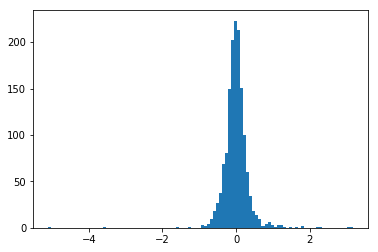

In [16]:
#Run Model
from sklearn.linear_model import LinearRegression
features = train.drop('SalePrice', axis = 1)
price = train['SalePrice'] 
lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
plt.hist(residuals, bins = 100)
#residuals



In [11]:
print('R^2 is equal to %.3f' %lm.score(features, price))
print('RSS is equal to %.3f' %np.sum((lm.predict(features) - price) ** 2))
print('The intercept is %.3f' %lm.intercept_)
print('The slopes are %s' %lm.coef_)

R^2 is equal to 0.869
RSS is equal to 191.927
The intercept is -1.464
The slopes are [-2.32077844e-05  1.35968461e-01 -2.27237141e-02  5.92729083e-02
  1.22723172e-02 -7.84246050e-03  3.15148953e-01  5.59156342e-02
  2.04672122e-02 -5.47060139e-02  9.29111128e-02  1.06163661e-01
  1.31607488e-01  3.10230679e-01  2.80758135e-02 -6.31263764e-02
  1.20345077e-01  9.43996253e-03 -1.11753124e-01  1.91680901e-01
  5.72397443e-02  1.75471766e-01 -4.49389819e-02  4.23564024e-02
  6.93922115e-02  1.18070344e-01 -2.13333340e-01 -1.40743290e-01
 -9.49803445e-02  9.58338515e-02  7.68565731e-02  1.86718513e-02
 -3.69825091e-03  2.76279014e-04  6.77635457e-02 -1.71091667e-03
  1.65302799e-02 -3.05325011e-01 -2.11683200e-01 -1.01554982e-01
 -3.85315136e-01 -3.04235098e-01 -2.09173770e-01 -1.89794029e-01
  6.13531397e-02 -1.61740408e-01 -2.17091883e-01 -4.64459230e-02
 -1.32250557e-03 -1.46189291e-01 -1.56118372e-01  2.13935861e-02
  8.40050863e-02  7.75350542e-02  8.01242348e-03  4.69903356e-02
 -6.9

In [18]:
import statsmodels.api as sm
X_add_constant = sm.add_constant(features)
mlr_stats = sm.OLS(price, X_add_constant)
mlr_stats.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     72.41
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:43   Log-Likelihood:                -590.42
No. Observations:                1460   AIC:                             1427.
Df Residuals:                    1337   BIC:                             2077.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4645      0.332     -4.409      0.000      -2.116      -0.813
Unnamed: 0            -2.321e-05   2.47e-05     -0.941      0.347   -7.16e-05    2.52e-05
LotFrontage               0.1360      0.024      5.606      0.000       0.088       0.184
LotArea                  -0.0227      0.019     -1.196      0.232      -0.060       0.015
MasVnrArea                0.0593      0.016      3.631      0.000       0.027       0.091
HeatingQC                 0.0123      0.015      0.824      0.410      -0.017       0.041
LowQualFinSF             -0.0078      0.014     -0.580      0.562      -0.034       0.019
GrLivArea                 0.3151      0.047      6.656      0.000       0.222       0.408
FullBath                  0.0559      0.012      4.533      0.000       0.032       0.080
HalfBath                  0.0205      0.009      2.227      0.026       0.002       0.038
BedroomAbvGr             -0.0547      0.016     -3.319      0.001      -0.087      -0.022
TotRmsAbvGrd              0.0929      0.024      3.924      0.000       0.046       0.139
Functional                0.1062      0.025      4.209      0.000       0.057       0.156
GarageCars                0.1316      0.025      5.332      0.000       0.083       0.180
MSZoning_Residential      0.3102      0.145      2.143      0.032       0.026       0.594
LotShape_Reg              0.0281      0.025      1.108      0.268      -0.022       0.078
LandContour_NotLvl       -0.0631      0.043     -1.454      0.146      -0.148       0.022
LotConfig_CulDSac         0.1203      0.050      2.406      0.016       0.022       0.218
LotConfig_Inside          0.0094      0.028      0.339      0.735      -0.045       0.064
LotConfig_Other          -0.1118      0.062     -1.815      0.070      -0.233       0.009
LandSlope_Mod             0.1917      0.060      3.208      0.001       0.074       0.309
LandSlope_Sev             0.0572      0.148      0.386      0.699      -0.233       0.348
Condition1_Norm           0.1755      0.039      4.447      0.000       0.098       0.253
Condition1_Pos           -0.0449      0.088     -0.510      0.610      -0.218       0.128
Condition1_RR             0.0424      0.073      0.580      0.562      -0.101       0.186
HouseStyle_1.5Unf         0.0694      0.114      0.607      0.544      -0.155       0.294
HouseStyle_1Story         0.1181      0.049      2.393      0.017       0.021       0.215
HouseStyle_2.5Fin        -0.2133      0.182     -1.172      0.242      -0.571       0.144
HouseStyle_2.5Unf        -0.1407      0.129     -1.093      0.275      -0.393       0.112
HouseStyle_2Story        -0.0950      0.046     -2.077      0.038      -0.185      -0.005
HouseStyle_SFoyer         0.0958      0.085      1.132      0.258      -0.070       0.262
HouseStyle_SLvl        

In [47]:
#Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn import datasets
ridge = Ridge()
ridge.fit(features, price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=features.columns)

the ridge intercept is: -1.47


Unnamed: 0              -0.000023
LotFrontage              0.138553
LotArea                 -0.023267
MasVnrArea               0.062344
HeatingQC                0.011389
LowQualFinSF            -0.009259
GrLivArea                0.306363
FullBath                 0.056080
HalfBath                 0.020036
BedroomAbvGr            -0.054321
TotRmsAbvGrd             0.091386
Functional               0.103090
GarageCars               0.130698
MSZoning_Residential     0.273022
LotShape_Reg             0.026481
LandContour_NotLvl      -0.060243
LotConfig_CulDSac        0.120388
LotConfig_Inside         0.009108
LotConfig_Other         -0.109716
LandSlope_Mod            0.179985
LandSlope_Sev            0.035208
Condition1_Norm          0.173119
Condition1_Pos          -0.042942
Condition1_RR            0.036666
HouseStyle_1.5Unf        0.058969
HouseStyle_1Story        0.109726
HouseStyle_2.5Fin       -0.165029
HouseStyle_2.5Unf       -0.125945
HouseStyle_2Story       -0.090768
HouseStyle_SFo

In [42]:
alphas = np.linspace(0.01, 10, 100)
ridge.set_params(normalize=False)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(features, price)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(features, price))
coefs = pd.DataFrame(coefs, index = alphas, columns = features.columns)  

Text(0,0.5,'slope values')

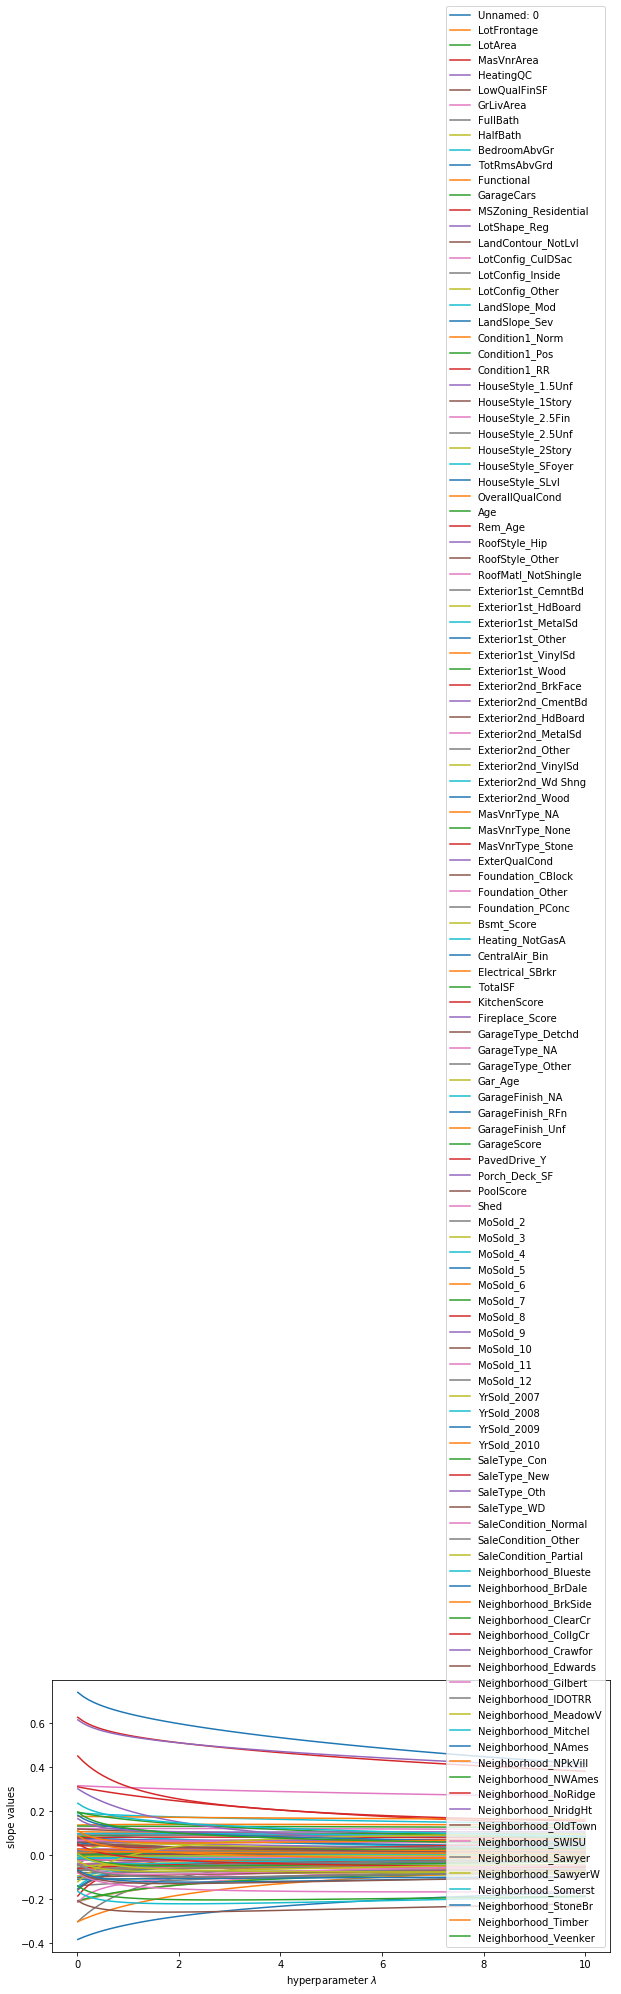

In [43]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0,0.5,'$R^2$')

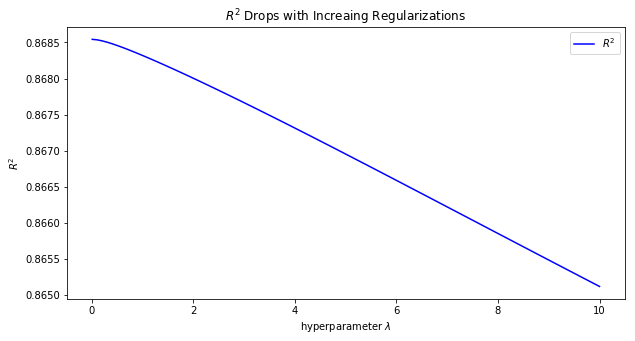

In [44]:
plt.plot(alphas, scores, c='b', label=r'$R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [38]:
lasso  = Lasso()
alphas = np.linspace(0.01, 5, 100)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(features, price)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = features.columns)  

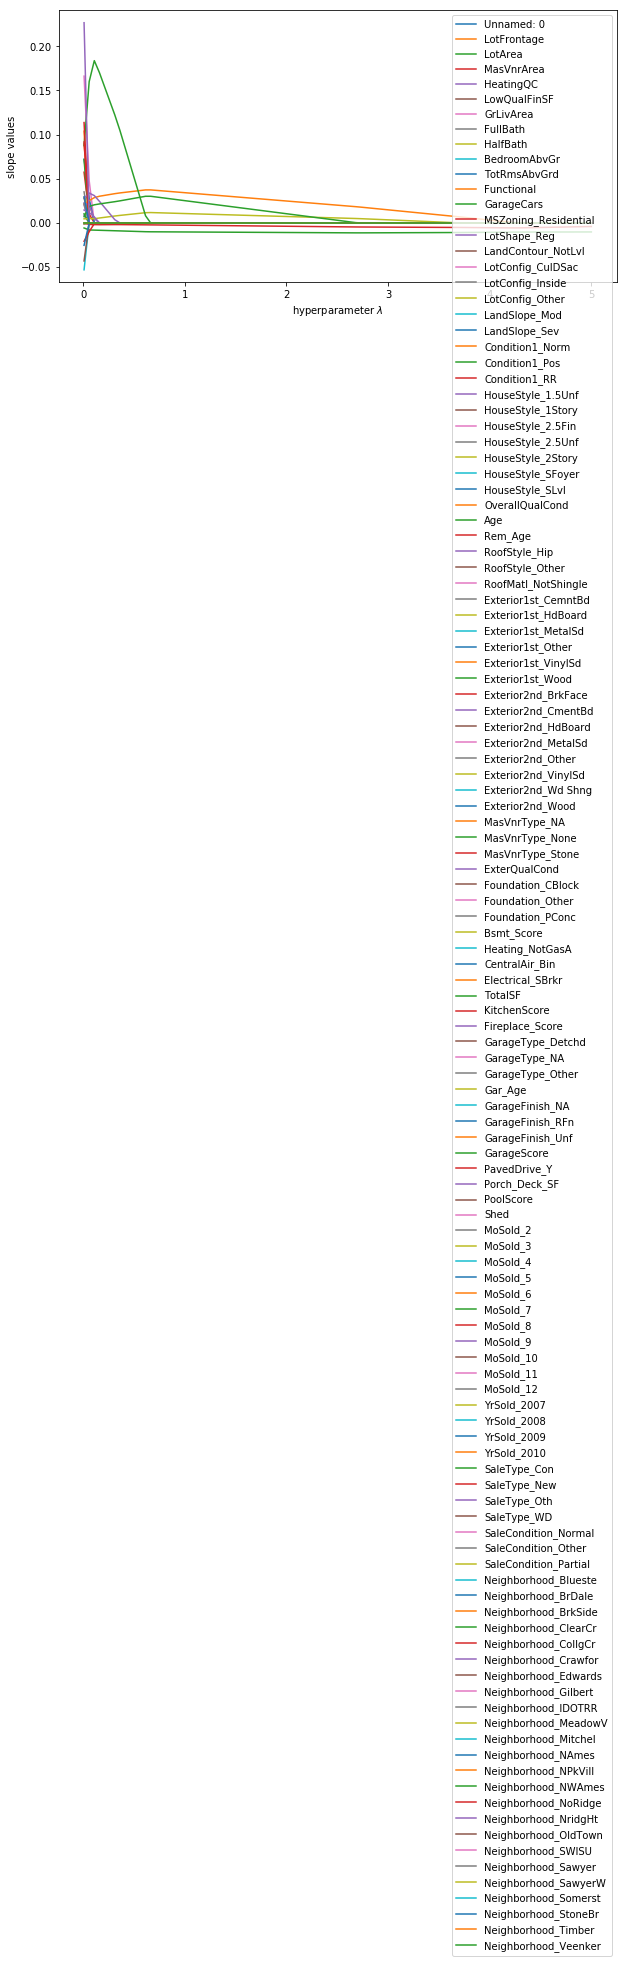

In [39]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)  

(0, 0.01)

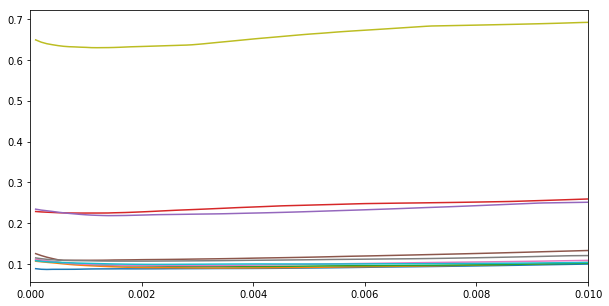

In [72]:
alphas = np.linspace(.0001, .01, 100)
lasso_cv = LassoCV(alphas = alphas, cv = 10, max_iter = 10000, normalize = False)
lasso_cv.fit(features,price)
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_)
plt.xlim((0, .01)) 

#Use code below for test set
#lasso.set_params(alpha = lasso_cv.alpha_)
#lasso.fit(features,price)
#mean_squared_error(price_test, lasso.predict(features))